# Verification of the Rayleigh Ritz formulation

Presented within Rafael's master dissertation "COMPOSITE PLATE OPTIMIZATION COMBINING SEMIANALYTICAL MODEL, LAMINATION PARAMETERS AND A GRADIENT-BASED OPTIMIZER". 

Access the full repository with complete study and NASTRAN FEM model at: https://github.com/rafaelpsilva07/rafaelmscdissertation

## Simply Supported study case (SSSS)

This study case aims to verify the Rayleigh-Ritz implementation made with Composipy (Silva,
R.P. 2023). Mathematical verification of the Rayleigh-Ritz implementation is made against
analytical buckling equation and FEM model.
The benchmarking example is a simply supported plate with biaxial load, which considers a
quasi-isotropic layup [(45/-45)2/02/902]s and properties according Table below. This example came
from Kassapoglou (2010).

<img src="./mechanical_prop_verification_problem.png" width="400" height="200">

Dimension of the square plate is 100 mm and the load ratio (ùëÅùë¶/ùëÅùë•) is 0.5. Analytical solution
for this problem using Equation below is 234.7 N/mm.

$$\lambda = \pi^2\frac{[D_{11}m^4 +2(D_{12}+2D_{66})m^2n^2(a/b)^2 + D_{22}n^4(a/b)^4  ]}{a^2 (m^2 + (N_{x}/N_{y}) n^2 (a/b)^2)}$$

This problem using composipy results in 225.9 N/mm. See code below.

In [1]:
from composipy import OrthotropicMaterial, LaminateProperty, PlateStructure

min eigenvalue is  225.9 N/mm


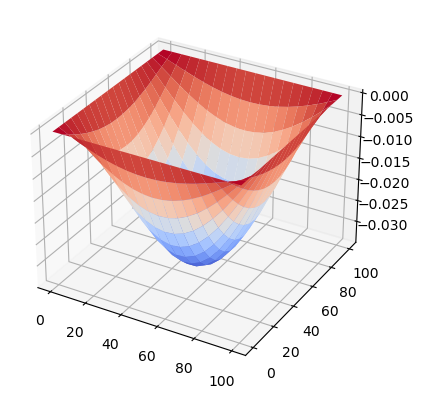

In [5]:
E1 = 137.9e3
E2 = 11.7e3
v12 = 0.31
G12 = 4.82e3
t = 0.1524

a = 100
b = 100

Nxx = -1
Nyy = -0.5

m = 7
n = 7

mat = OrthotropicMaterial(E1, E2, v12, G12, t)
stack = [45, -45]*2 + [0]*2 + [90]*2
stack += stack[::-1]
lam = LaminateProperty(stack, mat)
plate = PlateStructure(lam, a, b, "PINNED", Nxx=Nxx, Nyy=Nyy, m=m, n=n)

eigenvalue, eigenvector = plate.buckling_analysis()
print(f'min eigenvalue is {eigenvalue[0]: .1f} N/mm')

plate.plot_eigenvalue()

## Different boundary conditions
Table below extends the study for different boundary conditions in order to verify polynomial
functions presented in section 2.1.3. The results are verified against a NASTRAN FEM model
and the maximum difference is 0.7%. Table 6 presents the first buckling mode deformation
shape.

<img src="./first_eigenvalue_BC.png"  height="150">

### Clamped study case (CCCC)

min eigenvalue is  495.0 N/mm


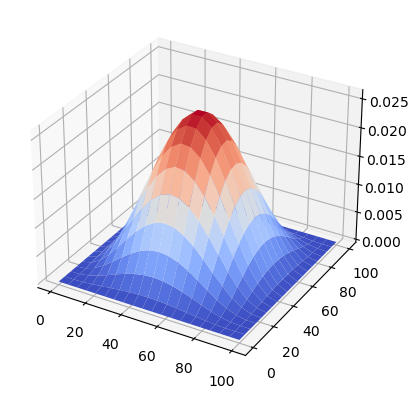

In [7]:
lam = LaminateProperty(stack, mat)
plate = PlateStructure(lam, a, b, "CLAMPED", Nxx=Nxx, Nyy=Nyy, m=m, n=n)

eigenvalue, eigenvector = plate.buckling_analysis()
print(f'min eigenvalue is {eigenvalue[0]: .1f} N/mm')

plate.plot_eigenvalue()

### Simply supported with one free edge study case (SSSC)

min eigenvalue is  89.6 N/mm


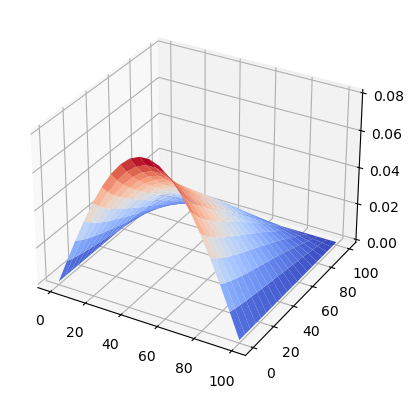

In [9]:
constraints = {    
     'x0' : ['TX', 'TY', 'TZ'],
     'xa' : ['TX', 'TY', 'TZ'],
     'y0' : [],
     'yb' : ['TX', 'TY', 'TZ']
 }

plate = PlateStructure(lam, a, b, constraints, Nxx=Nxx, Nyy=Nyy)
eigenvalue, eigenvector = plate.buckling_analysis()
print(f'min eigenvalue is {eigenvalue[0]: .1f} N/mm')

plate.plot_eigenvalue()

### Comparison with NASTRAN deformed shape

<img src="./Nastran_deformed.png" width="600" >

## References

Kassapoglou, Christos. Design and Analysis of Composite Structures: With
Applications to Aerospace Structures. John Wiley & Sons, 2010.